In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron

In [2]:
np.random.seed(39)

In [3]:
def activation_func(X):
    f = np.zeros((X.shape[0],1))
    inc = 0
    for x in X:
        if(x >= 0):
            f[inc]=1.0
        else:
            f[inc]=0.0
        inc += 1
    return f

def train_weights(X, y, l_rate, numEpochs):
    
    idx = np.random.permutation(4)
    
    Xp = X[idx]
    yp = y[idx]

    W = np.random.randn(X.shape[1],1)
    
    error_vec = []
    error_min = np.Inf
    for epoch in range(n_epoch):
        for i in range(0,len(Xp)):
            xp = Xp[i,:].reshape(1,3)
            g = xp.dot(W)
            y_pred = activation_func(g)
            e = yp[i].ravel()[0]-y_pred.ravel()[0]
            W = W + l_rate*e*xp.T

        error = mean_squared_error(activation_func(X.dot(W)), y)
        error_vec.append(error)
        if(error < error_min):
            error_min = error
            Wmin = W            
            
    return Wmin, error_min, error_vec

In [4]:
# Number of examples.
N = 4

x0 = np.array([1,1,1,1])
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])



X = np.c_[x0,x1,x2]

## AND

In [17]:
y = x1 & x2

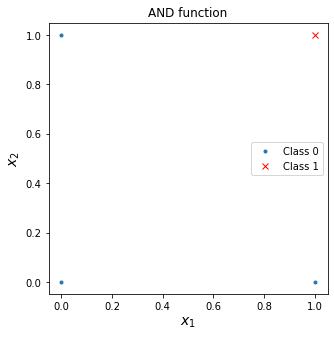

In [18]:

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('AND function')
plt.legend()
plt.show()

In [19]:

l_rate = 0.001
n_epoch = 2000

Wmin, error_min, error_vec = train_weights(X, y, l_rate, n_epoch)

error = mean_squared_error(activation_func(X.dot(Wmin)), y)
print('MSE: ', error)

MSE:  0.0


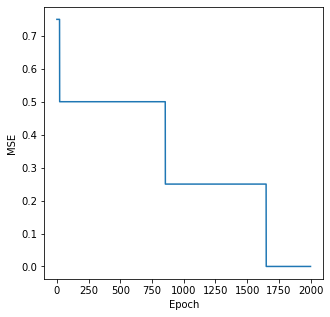

In [20]:

fig = plt.figure(figsize=(5,5))
plt.plot(error_vec)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [21]:

per = Perceptron(random_state=42)
per.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

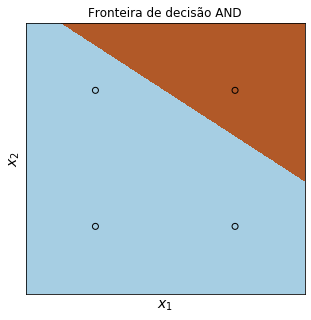

In [22]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Fronteira de decisão AND')
plt.show()

## OR

In [23]:
y = x1 | x2

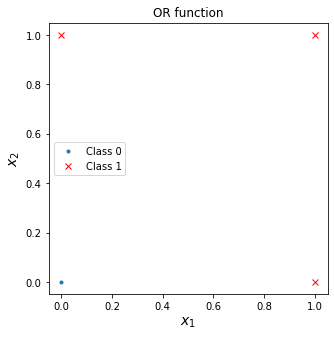

In [24]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('OR function')
plt.legend()
plt.show()

In [25]:
l_rate = 0.001
n_epoch = 2000

Wmin, error_min, error_vec = train_weights(X, y, l_rate, n_epoch)

error = mean_squared_error(activation_func(X.dot(Wmin)), y)
print('MSE: ', error)

MSE:  0.0


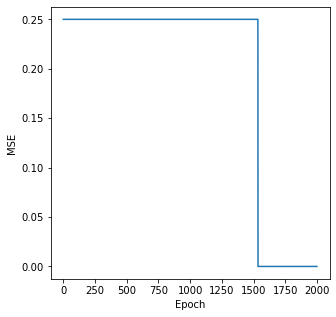

In [26]:
fig = plt.figure(figsize=(5,5))
plt.plot(error_vec)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [27]:
per = Perceptron(random_state=42)
per.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

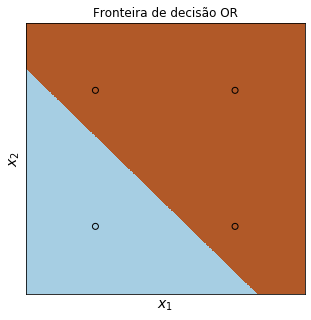

In [28]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Fronteira de decisão OR')
plt.show()